## **MODEL BUILDING**

The neural network model is to be built by adding different network layers like convolution, pooling, flattening, dropout and neural layers.

In this milestone, we start building our model by:

1.Initializing the modeL

2.Adding Convolution layers

3.Adding Pooling layers

4.Flatten layer

5.Full connection layers which include hidden layers

At last, we compile the model with layers we added to complete the neural network structure

#Import the necessary libraries

In [6]:
import tensorflow
from tensorflow import keras

In [7]:
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam

##Initializing the model and adding CNN and Dense layers

In [8]:
model = Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=256,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 256)               32514304  
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 32,515,457
Trainable params: 32,515,457
Non-trainable params: 0
____________________________________________

In [9]:
#Compile the model
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

##Training The Model

In [10]:
y = model.fit_generator(train,steps_per_epoch=14,epochs=15,validation_data=test,validation_steps=4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/15
14/14 [==============================] - 156s 11s/step - loss: 1.2753 - accuracy: 0.7752 - val_loss: 0.1375 - val_accuracy: 0.9587
Epoch 2/15
14/14 [==============================] - 30s 2s/step - loss: 0.1976 - accuracy: 0.9128 - val_loss: 0.0962 - val_accuracy: 0.9752
Epoch 3/15
14/14 [==============================] - 28s 2s/step - loss: 0.1897 - accuracy: 0.9128 - val_loss: 0.0818 - val_accuracy: 0.9835
Epoch 4/15
14/14 [==============================] - 28s 2s/step - loss: 0.1746 - accuracy: 0.9289 - val_loss: 0.0814 - val_accuracy: 0.9835
Epoch 5/15
14/14 [==============================] - 33s 2s/step - loss: 0.1525 - accuracy: 0.9243 - val_loss: 0.0598 - val_accuracy: 0.9752
Epoch 6/15
14/14 [==============================] - 32s 2s/step - loss: 0.1985 - accuracy: 0.9151 - val_loss: 0.0602 - val_accuracy: 0.9835
Epoch 7/15
14/14 [==============================] - 29s 2s/step - loss: 0.1558 - accuracy: 0.9335 - val_loss: 0.0596 - val_accuracy: 0.9917
Epoch 8/15
14/14 [

In [11]:
model.evaluate(test)

4/4 [==============================] - 6s 1s/step - loss: 0.0647 - accuracy: 0.9587


[0.06468850374221802, 0.9586777091026306]

##Save the Model

In [12]:
model.save('forest.h5')

##Predictions

In [30]:
from keras.models import load_model
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image
from keras.utils import img_to_array

In [15]:
model = load_model("forest.h5")

In this we are going to test our model and check its performance.

In [31]:
def prediction(img_path):
    i = cv2.imread(img_path)
    i = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
    img = Image.open(img_path)
    img = img.resize((128,128))
    x = img_to_array(img)
    x = np.expand_dims(x,axis=0)
    pred = model.predict(x)
    plt.imshow(i)
    print("%s"%("ALERT!!!FOREST FIRE DETECTED... SMS SENT.." if pred==[[1.]] else "NO FOREST FIRE DETECTED..."))

1/1 [==============================] - 0s 42ms/step
ALERT!!!FOREST FIRE DETECTED... SMS SENT..


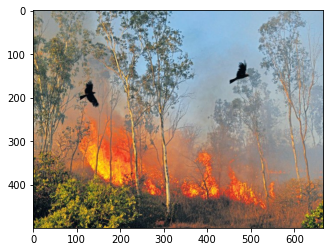

In [32]:
prediction(r'/content/drive/MyDrive/Datasets/Dataset/test_set/with fire/599857.jpg')

1/1 [==============================] - 0s 61ms/step
NO FOREST FIRE DETECTED...


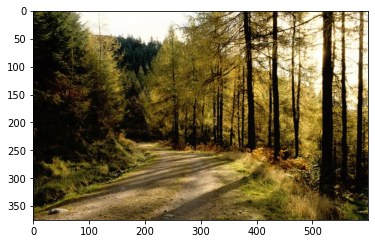

In [34]:
prediction(r'/content/drive/MyDrive/Datasets/Dataset/test_set/forest/1009821.jpg')

1/1 [==============================] - 0s 46ms/step
ALERT!!!FOREST FIRE DETECTED... SMS SENT..


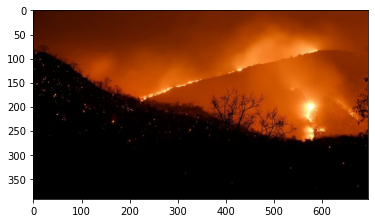

In [33]:
prediction(r'/content/drive/MyDrive/Datasets/Dataset/test_set/with fire/Fire_2_696x392.jpg')

Our model has predicted correctly!!!